# Model Tourism

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
tourism_place = pd.read_csv("C:/Users/LENOVO/Downloads/Wisata_Data.csv")
tourism_place = tourism_place.drop(columns = "Unnamed: 0")
tourism_review = pd.read_csv("C:/Users/LENOVO/Downloads/Wisata_Reviewers.csv")
tourism_review = tourism_review.drop(columns = "Unnamed: 0")

In [3]:
tourism_place

,name,place_id,formatted_address,types,user_ratings_total,rating
0,Sacred Monkey Forest Sanctuary,ChIJZ5sY9kM90i0RVsPvSxZD7LY,"Jl. Monkey Forest, Ubud, Kecamatan Ubud, Kabup...","tourist_attraction,park,point_of_interest,esta...",38207,4.5
1,Garuda Wisnu Kencana Cultural Park,ChIJx97hVM9E0i0RUVpPBj5miBk,"Uluwatu St, Ungasan, South Kuta, Badung Regenc...","park,tourist_attraction,point_of_interest,esta...",55052,4.5
2,Leke Leke Waterfall,ChIJXfZP2tYg0i0RUaM-yoiFiXs,"J5PW+7W7, Antapan, Baturiti, Tabanan Regency, ...","tourist_attraction,point_of_interest,establish...",1313,4.4
3,Kanto Lampo Waterfall,ChIJoQHcmv8X0i0RI6vXSuiyCOo,"Jl. Kaliasem, Beng, Kec. Gianyar, Kabupaten Gi...","tourist_attraction,point_of_interest,establish...",1888,4.5
4,Tukad Cepung Waterfall,ChIJQ6ocSKAb0i0RP1CIrkak0ws,"Central parkir waterfall tukad cepung, Jl. Tem...","tourist_attraction,point_of_interest,establish...",1924,4.6
...,...,...,...,...,...,...
659,Tegaldowo Puspa Gading Park,ChIJcd37dqn5ei4RwEyVzTojEG0,"48PF+FCG, Jl. Grujugan, Grujugan, Bantul, Kec....","tourist_attraction,point_of_interest,establish...",2394,4.4
660,Lembah UGM Lake,ChIJtYZr87NZei4RAatspai7RAg,"69JM+976, Karang Gayam, Caturtunggal, Depok, S...","park,tourist_attraction,point_of_interest,esta...",661,4.6
661,Yogyakarta berwisata,ChIJnUdvIBVXei4RX-fiGD3D4vg,"Jl. Nila Sari No.500, Tahunan, Kec. Umbulharjo...","point_of_interest,establishment",66,5.0
662,Tourism Village Mlangi,ChIJGfRTU39Yei4RHMKHNMVgDPg,"Jl. Masjid Patok Negoro Mlangi, Mlangi, Nogoti...","tourist_attraction,mosque,place_of_worship,poi...",167,4.8


In [4]:
types_dummies = pd.get_dummies(tourism_place['types'].str.get_dummies(','), prefix='types', prefix_sep='_')
types_dummies

,amusement_park,aquarium,art_gallery,cafe,church,establishment,food,hindu_temple,library,local_government_office,...,place_of_worship,point_of_interest,restaurant,rv_park,school,shopping_mall,store,tourist_attraction,travel_agency,zoo
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
660,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
661,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
662,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0


In [5]:
df_all = pd.concat([tourism_place, types_dummies], axis=1)
df_all = df_all.drop(columns = ["name", "formatted_address", "types"])
df_all = pd.merge(tourism_review, df_all, on = "place_id")
df_all.rename(columns={'rating': 'Ave_Rating'}, inplace=True)
df_all

,place_id,place_name,reviewer_name,reviewer_rating,reviewer_review,reviewers_Id,user_ratings_total,Ave_Rating,amusement_park,aquarium,...,place_of_worship,point_of_interest,restaurant,rv_park,school,shopping_mall,store,tourist_attraction,travel_agency,zoo
0,ChIJZ5sY9kM90i0RVsPvSxZD7LY,Sacred Monkey Forest Sanctuary,Suzanna Kejairi,5,Monkey Forest is the perfect attraction for al...,1934,38207,4.5,0,0,...,0,1,0,0,0,0,0,1,0,0
1,ChIJZ5sY9kM90i0RVsPvSxZD7LY,Sacred Monkey Forest Sanctuary,K Baz,1,Would not do this again. The monkey forest is ...,1108,38207,4.5,0,0,...,0,1,0,0,0,0,0,1,0,0
2,ChIJZ5sY9kM90i0RVsPvSxZD7LY,Sacred Monkey Forest Sanctuary,Aneka Truman,5,Wonderful experience. A nice place to explore....,215,38207,4.5,0,0,...,0,1,0,0,0,0,0,1,0,0
3,ChIJZ5sY9kM90i0RVsPvSxZD7LY,Sacred Monkey Forest Sanctuary,Denise F,5,I thought the experience was Unforgettable. Th...,531,38207,4.5,0,0,...,0,1,0,0,0,0,0,1,0,0
4,ChIJZ5sY9kM90i0RVsPvSxZD7LY,Sacred Monkey Forest Sanctuary,Abigail Lorenzana,4,It was a good experience! The monkeys are “fre...,52,38207,4.5,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,ChIJZYb5zIhXei4R1DZBDkoxj1I,Yogyakarta Batik Monument,Reno Herdhiansyah,5,A simple monument. Nice!,1656,222,4.5,0,0,...,0,1,0,0,0,0,0,1,0,0
3692,ChIJZYb5zIhXei4R1DZBDkoxj1I,Yogyakarta Batik Monument,Aditya Gold,5,"Looks like copper plate (not sure, could be ir...",91,222,4.5,0,0,...,0,1,0,0,0,0,0,1,0,0
3693,ChIJZYb5zIhXei4R1DZBDkoxj1I,Yogyakarta Batik Monument,Frankly Christober Pamian,3,"Public spaces in downtown of Yogyakarta But, t...",781,222,4.5,0,0,...,0,1,0,0,0,0,0,1,0,0
3694,ChIJZYb5zIhXei4R1DZBDkoxj1I,Yogyakarta Batik Monument,Ahmad Saifurrasyid,3,"The smell is not good. Beware of ""outdoor toil...",131,222,4.5,0,0,...,0,1,0,0,0,0,0,1,0,0


In [6]:
df_place = df_all.drop(columns = ["place_name", "reviewer_name", "reviewer_rating", "reviewer_review", "reviewers_Id",
                                  "user_ratings_total", "point_of_interest", "tourist_attraction", "establishment"])
df_place

,place_id,Ave_Rating,amusement_park,aquarium,art_gallery,cafe,church,food,hindu_temple,library,...,natural_feature,park,place_of_worship,restaurant,rv_park,school,shopping_mall,store,travel_agency,zoo
0,ChIJZ5sY9kM90i0RVsPvSxZD7LY,4.5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,ChIJZ5sY9kM90i0RVsPvSxZD7LY,4.5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,ChIJZ5sY9kM90i0RVsPvSxZD7LY,4.5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,ChIJZ5sY9kM90i0RVsPvSxZD7LY,4.5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,ChIJZ5sY9kM90i0RVsPvSxZD7LY,4.5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,ChIJZYb5zIhXei4R1DZBDkoxj1I,4.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3692,ChIJZYb5zIhXei4R1DZBDkoxj1I,4.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3693,ChIJZYb5zIhXei4R1DZBDkoxj1I,4.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3694,ChIJZYb5zIhXei4R1DZBDkoxj1I,4.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_user = df_all.drop(columns = ["place_id", "place_name", "reviewer_review", "reviewer_name", "user_ratings_total",
                                 "Ave_Rating", "point_of_interest", "tourist_attraction", "establishment"])
reviewer_id = df_user.pop("reviewers_Id")
df_user.insert(0, 'reviewers_Id', reviewer_id)
df_user

,reviewers_Id,reviewer_rating,amusement_park,aquarium,art_gallery,cafe,church,food,hindu_temple,library,...,natural_feature,park,place_of_worship,restaurant,rv_park,school,shopping_mall,store,travel_agency,zoo
0,1934,5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1108,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,215,5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,531,5,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,52,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,1656,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3692,91,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3693,781,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3694,131,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
column_sum = df_user.loc[:, 'amusement_park':'zoo'].sum()
column_sum

amusement_park             170
aquarium                    10
art_gallery                 10
cafe                        40
church                       5
food                       100
hindu_temple                45
library                      5
local_government_office      5
lodging                     25
mosque                      50
museum                     240
natural_feature             60
park                       755
place_of_worship           160
restaurant                  65
rv_park                      5
school                       5
shopping_mall               10
store                       20
travel_agency               25
zoo                         50
dtype: int64

In [9]:
df_user.iloc[:, 2:] = df_user.iloc[:, 2:].mul(df_user["reviewer_rating"], axis=0)
df_user

,reviewers_Id,reviewer_rating,amusement_park,aquarium,art_gallery,cafe,church,food,hindu_temple,library,...,natural_feature,park,place_of_worship,restaurant,rv_park,school,shopping_mall,store,travel_agency,zoo
0,1934,5,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
1,1108,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,215,5,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
3,531,5,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
4,52,4,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,1656,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3692,91,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3693,781,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3694,131,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y = df_user.pop("reviewer_rating")
y

0       5
1       1
2       5
3       5
4       4
       ..
3691    5
3692    5
3693    3
3694    3
3695    3
Name: reviewer_rating, Length: 3696, dtype: int64

In [11]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3696 entries, 0 to 3695
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   reviewers_Id             3696 non-null   int64
 1   amusement_park           3696 non-null   int64
 2   aquarium                 3696 non-null   int64
 3   art_gallery              3696 non-null   int64
 4   cafe                     3696 non-null   int64
 5   church                   3696 non-null   int64
 6   food                     3696 non-null   int64
 7   hindu_temple             3696 non-null   int64
 8   library                  3696 non-null   int64
 9   local_government_office  3696 non-null   int64
 10  lodging                  3696 non-null   int64
 11  mosque                   3696 non-null   int64
 12  museum                   3696 non-null   int64
 13  natural_feature          3696 non-null   int64
 14  park                     3696 non-null   int64
 15  plac

In [12]:
average_values = df_user.groupby("reviewers_Id")[["amusement_park", "aquarium", "art_gallery", "cafe", "church", "food", "hindu_temple", "library", "local_government_office", "lodging", "mosque", "museum", "natural_feature", "park", "place_of_worship", "restaurant", "rv_park", "school", "shopping_mall", "store", "travel_agency", "zoo"]].mean()
average_values = average_values.reset_index()
average_values

,reviewers_Id,amusement_park,aquarium,art_gallery,cafe,church,food,hindu_temple,library,local_government_office,...,natural_feature,park,place_of_worship,restaurant,rv_park,school,shopping_mall,store,travel_agency,zoo
0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2513,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2514,2514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2515,2515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2516,2516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_user = pd.merge(df_user["reviewers_Id"], average_values, on = "reviewers_Id")
df_user

,reviewers_Id,amusement_park,aquarium,art_gallery,cafe,church,food,hindu_temple,library,local_government_office,...,natural_feature,park,place_of_worship,restaurant,rv_park,school,shopping_mall,store,travel_agency,zoo
0,1934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691,1381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3692,91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3693,781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3694,131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
item_vecs = df_place.drop_duplicates(subset="place_id", keep='first')
item_vecs = item_vecs.drop(columns = "place_id")
item_vecs = item_vecs.to_numpy()
item_vecs

array([[4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [4.4, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [5. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4.8, 0. , 0. , ..., 0. , 0. , 0. ],
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ]])

In [15]:
item_train = df_place.iloc[:, 1:]
item_train = item_train.to_numpy()
item_train

array([[4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [4.5, 0. , 0. , ..., 0. , 0. , 0. ]])

In [16]:
user_train = df_user.iloc[:, 1:]
user_train = user_train.to_numpy()
user_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
y_train = y.to_numpy()
y_train

array([5, 1, 5, ..., 3, 3, 3], dtype=int64)

In [18]:
scalerItem = StandardScaler()
item_train_scaled = scalerItem.fit_transform(item_train)
item_train_unscaled = item_train

scalerUser = StandardScaler()
user_train_scaled = scalerUser.fit_transform(user_train)
user_train_unscaled = user_train

scalerTarget = MinMaxScaler((-1, 1))
y_train_scaled = scalerTarget.fit_transform(y_train.reshape(-1, 1))
y_train_unscaled = y_train

In [19]:
item_train, item_test, item_train_scaled, item_test_scaled = train_test_split(item_train, item_train_scaled, train_size=0.90, shuffle=True, random_state=1)
user_train, user_test, user_train_scaled, user_test_scaled = train_test_split(user_train, user_train_scaled, train_size=0.90, shuffle=True, random_state=1)
y_train, y_test, y_train_scaled, y_test_scaled = train_test_split(y_train, y_train_scaled, train_size=0.90, shuffle=True, random_state=1)

In [20]:
num_user_features = user_train.shape[1]
num_item_features = item_train.shape[1]

In [21]:
num_outputs = 8
tf.random.set_seed(42)
user_NN = tf.keras.models.Sequential([   
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(num_outputs), 
])

item_NN = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(num_outputs),
])

input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

dot_product = tf.keras.layers.Dot(axes=1)([vu, vm])
output = tf.keras.layers.Dense(1, activation='tanh')(dot_product)

model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 22)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 23)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 8)            1400        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 8)            1432        ['input_2[0][0]']                
                                                                                              

In [22]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_mse',  # Memantau metrik val_mse
    mode='min',         # Mode 'min' berarti kita ingin val_mse semakin kecil
    patience=20,        # Jika val_mse tidak menunjukkan perbaikan selama 10 epochs, pelatihan dihentikan
    verbose=1           # Menampilkan pesan ketika pelatihan dihentikan
)

tf.random.set_seed(42)
cost_fn = tf.keras.losses.Huber()
opt = tf.keras.optimizers.Nadam()
model.compile(optimizer=opt,
              loss=cost_fn,
             metrics=["mse"])

In [23]:
history = model.fit([user_train_scaled[:, :], item_train_scaled[:, :]], y_train_scaled, epochs=100,
                    validation_data=([user_test_scaled[:, :], item_test_scaled[:, :]], y_test_scaled),
                    callbacks=[early_stopping_callback], batch_size = 16)

Epoch 1/100
208/208 [==============================] - 4s 4ms/step - loss: 0.1022 - mse: 0.2154 - val_loss: 0.0810 - val_mse: 0.1706
Epoch 2/100
208/208 [==============================] - 0s 2ms/step - loss: 0.0896 - mse: 0.1886 - val_loss: 0.0785 - val_mse: 0.1634
Epoch 3/100
208/208 [==============================] - 0s 2ms/step - loss: 0.0874 - mse: 0.1834 - val_loss: 0.0792 - val_mse: 0.1658
Epoch 4/100
208/208 [==============================] - 1s 3ms/step - loss: 0.0871 - mse: 0.1828 - val_loss: 0.0780 - val_mse: 0.1616
Epoch 5/100
208/208 [==============================] - 1s 2ms/step - loss: 0.0868 - mse: 0.1821 - val_loss: 0.0789 - val_mse: 0.1629
Epoch 6/100
208/208 [==============================] - 0s 2ms/step - loss: 0.0864 - mse: 0.1808 - val_loss: 0.0791 - val_mse: 0.1661
Epoch 7/100
208/208 [==============================] - 1s 3ms/step - loss: 0.0854 - mse: 0.1785 - val_loss: 0.0790 - val_mse: 0.1656
Epoch 8/100
208/208 [==============================] - 0s 2ms/step - 

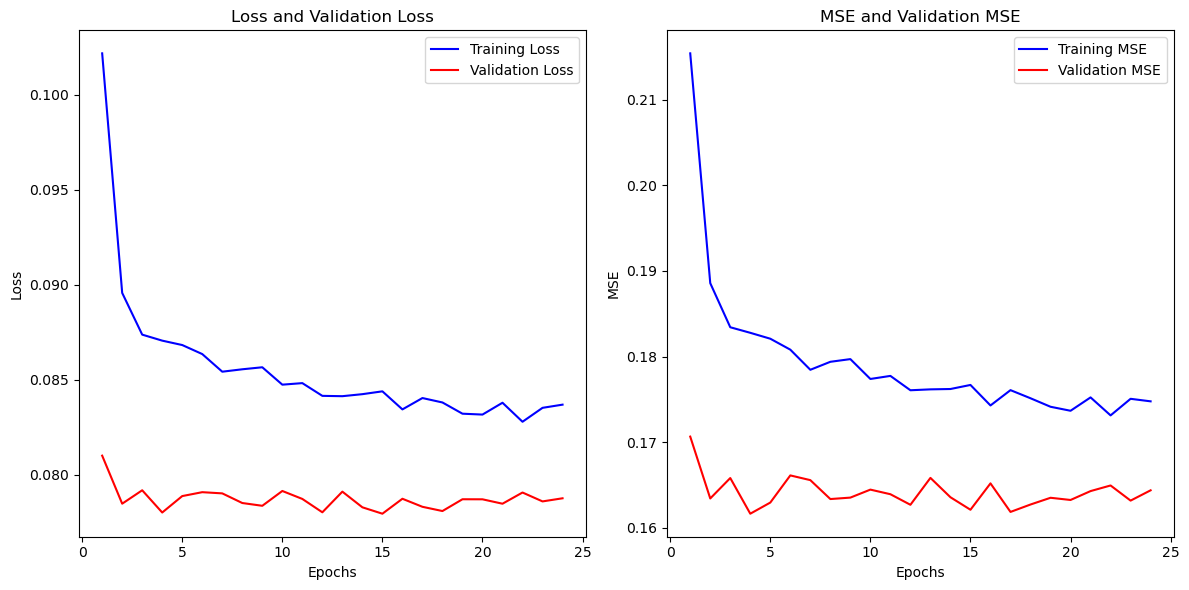

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

mse = history.history['mse']
val_mse = history.history['val_mse']

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(epochs, loss, 'b', label='Training Loss')
ax1.plot(epochs, val_loss, 'r', label='Validation Loss')
ax1.set_title('Loss and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, mse, 'b', label='Training MSE')
ax2.plot(epochs, val_mse, 'r', label='Validation MSE')
ax2.set_title('MSE and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')
ax2.legend()

plt.tight_layout()
plt.show()

In [25]:
# Menggunakan scaler untuk melakukan inverse transform pada data yang telah di-scaled
user_test_unscaled = scalerUser.inverse_transform(user_test_scaled)
item_test_unscaled = scalerItem.inverse_transform(item_test_scaled)
y_test_unscaled = scalerTarget.inverse_transform(y_test_scaled)

# Menampilkan beberapa contoh prediksi
for i in range(50):
    print('Urutan Ke-', i+1)
    print('Data Asli:', y_test_unscaled[i])
    prediction = model.predict([user_test_scaled[i].reshape(1, -1), item_test_scaled[i].reshape(1, -1)])
    prediction_unscaled = scalerTarget.inverse_transform(prediction)[0][0]
    print('Prediksi:', prediction_unscaled)
    print('---')

Urutan Ke- 1
Data Asli: [4.]
1/1 [==============================] - 0s 308ms/step
Prediksi: 4.062746
---
Urutan Ke- 2
Data Asli: [5.]
1/1 [==============================] - 0s 22ms/step
Prediksi: 4.5779657
---
Urutan Ke- 3
Data Asli: [5.]
1/1 [==============================] - 0s 23ms/step
Prediksi: 4.6645184
---
Urutan Ke- 4
Data Asli: [5.]
1/1 [==============================] - 0s 24ms/step
Prediksi: 4.379116
---
Urutan Ke- 5
Data Asli: [4.]
1/1 [==============================] - 0s 24ms/step
Prediksi: 4.583867
---
Urutan Ke- 6
Data Asli: [5.]
1/1 [==============================] - 0s 29ms/step
Prediksi: 4.735017
---
Urutan Ke- 7
Data Asli: [4.]
1/1 [==============================] - 0s 49ms/step
Prediksi: 4.0890636
---
Urutan Ke- 8
Data Asli: [5.]
1/1 [==============================] - 0s 27ms/step
Prediksi: 4.465676
---
Urutan Ke- 9
Data Asli: [4.]
1/1 [==============================] - 0s 28ms/step
Prediksi: 4.392934
---
Urutan Ke- 10
Data Asli: [5.]
1/1 [=========================

In [26]:
def predict_ratings(user_vec, item_vecs, model, scalerTarget, tourism_place, top_n=10):
    # Scale user vector
    suser_vec = scalerUser.transform(user_vec)

    # Scale item vectors
    sitem_vecs = scalerItem.transform(item_vecs)

    # Make a prediction
    y_p = model.predict([suser_vec[:, :], sitem_vecs[:, :]])

    # Unscale predicted ratings
    y_p_unscaled = scalerTarget.inverse_transform(y_p)

    # Sort the results, highest prediction first
    sorted_index = np.argsort(-y_p_unscaled, axis=0).reshape(-1).tolist()
    sorted_ypu = y_p_unscaled[sorted_index]
    sorted_items = item_vecs[sorted_index]

    # Get top N predictions
    top_n_indices = sorted_index[:top_n]
    top_n_ratings = sorted_ypu[:top_n]
    top_n_items = sorted_items[:top_n]

    # Combine with tourism_places DataFrame
    top_n_predictions = tourism_place.iloc[top_n_indices, :].copy()
    top_n_predictions['Predicted_Rating'] = top_n_ratings

    return top_n_predictions

In [27]:
new_amusement_park = 1
new_aquarium = 1
new_art_gallery = 1
new_cafe = 1
new_church = 1
new_food = 1
new_hindu_temple = 1
new_library = 1
new_local_government_office = 1
new_lodging = 1
new_mosque = 1
new_museum = 5
new_natural_feature = 1
new_park = 1
new_place_of_worship = 1
new_restaurant = 1
new_rv_park = 1
new_school = 1
new_shopping_mall = 1
new_store = 1
new_travel_agency = 1
new_zoo = 1

user_vec = np.array([[new_amusement_park, new_aquarium, new_art_gallery, new_cafe, new_church,
                      new_food, new_hindu_temple, new_library, new_local_government_office, new_lodging,
                      new_mosque, new_museum, new_natural_feature, new_park, new_place_of_worship,
                      new_restaurant, new_rv_park, new_school, new_shopping_mall,
                      new_store, new_travel_agency, new_zoo]])

user_vecs = np.repeat(user_vec, len(item_vecs), axis=0)

# Memanggil fungsi prediksi
predictions = predict_ratings(user_vecs, item_vecs, model, scalerTarget, tourism_place, top_n=5)

# Menampilkan hasil prediksi
predictions

18/18 [==============================] - 0s 2ms/step


,name,place_id,formatted_address,types,user_ratings_total,rating,Predicted_Rating
192,Ocarina Batam,ChIJFQP2qRmJ2TERcC3Hjir2oAA,"5322+97J, Sadai, Bengkong, Batam City, Riau Is...","tourist_attraction,point_of_interest,establish...",49,4.2,4.764810
476,Museum Adityawarman,ChIJcRVmd0651C8Re8cvlAEemYE,"Jl. Diponegoro No.10, Belakang Tangsi, Kec. Pa...","museum,tourist_attraction,point_of_interest,es...",3141,4.4,4.764810
196,Taman Mini Indonesia Indah,ChIJYaJ20FDtaS4RDNry7LknMQc,"TMII, Jl. Raya, Ceger, Kec. Cipayung, Kota Jak...","tourist_attraction,amusement_park,park,museum,...",147805,4.5,4.764634
190,Arsadi beach,ChIJEzLDwcmH2TERauwkgN8sJqE,"Kampung tua batu besar no 71, RT.003/RW.008, K...","tourist_attraction,point_of_interest,establish...",41,4.5,4.764634
36,Bali Swing,ChIJ5ZiPtys90i0RUok0dF7Lh9w,"Jl. Dewi Saraswati No.7, Bongkasa Pertiwi, Kec...","tourist_attraction,amusement_park,point_of_int...",11288,4.6,4.764634


In [28]:
predictions["types"]

192    tourist_attraction,point_of_interest,establish...
476    museum,tourist_attraction,point_of_interest,es...
196    tourist_attraction,amusement_park,park,museum,...
190    tourist_attraction,point_of_interest,establish...
36     tourist_attraction,amusement_park,point_of_int...
Name: types, dtype: object

In [29]:
import os

model_version = "1"
model_save = "model-tourism"
model_path = os.path.join(model_save, model_version)
tf.keras.models.save_model(model, model_path)
print("Model saved successfully!")

INFO:tensorflow:Assets written to: model-tourism\1\assets


INFO:tensorflow:Assets written to: model-tourism\1\assets


Model saved successfully!
